In [1]:
import pip
pip.main(['install','seaborn']);

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the 'c:\Users\Anna\.pyenv\pyenv-win\versions\3.9.6\python3.9.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output'

## Population Output - MATSim input

In [13]:
df_persons = pd.read_csv(output_path+'\df_persons.csv', index_col=[0])
df_persons.set_index("person_id", drop=True, inplace=True)
df_activities = pd.read_csv(output_path+'\df_activities.csv', index_col=[0])
df_trips = pd.read_csv(output_path+'\df_trips.csv', index_col=[0])

df_activities["o_order"] = df_activities.activity_order.values
df_activities["d_order"] = df_activities.activity_order.values
df_trips["o_order"] = df_trips.trip_order
df_trips["d_order"] = df_trips.trip_order + 1
df_joined_origin = df_activities.merge(df_trips, on=["person_id", "o_order"])
df_joined_dest = df_activities.merge(df_trips, on=["person_id", "d_order"])

df_activities = df_activities.merge(df_persons, on="person_id")
#df_merged = df_persons.merge(df_activities, on="person_id")


traveler_ids = df_activities.person_id.unique()

display(df_persons.head(2))
display(df_activities.head(2))
display(df_trips.head(2))

,trip_today,car_avail,driving_license
person_id,,,
1,False,True,True
356549,False,True,True


,person_id,purpose,start_time,end_time,activity_order,geometry,location_id,o_order,d_order,trip_today,car_avail,driving_license
0,1,home,NaN,NaN,0,POINT (741081.2944470095 1053674.974826472),14165.0,0,0,False,True,True
1,31,home,NaN,22622.0,0,POINT (742471.8361657752 1044495.092602994),98623.0,0,0,True,False,True


,person_id,traveling_mode,trip_order,o_order,d_order
0,6976,pt,0,0,1
1,6976,pt,1,1,2


In [44]:
travelers = df_activities.groupby("person_id")

In [47]:
df_count = [[i, df.shape[0]] for i, df in travelers]
df_count = pd.DataFrame(columns=["person_id", "activity_count"], data=df_count)
df_count.set_index("person_id", inplace=True, drop=True)
display(df_count.head(2))

,activity_count
person_id,
1,1
2,3


In [53]:
df_persons["activity_count"] = df_persons.merge(df_count, on="person_id").activity_count_y.values

In [54]:
display(df_persons.head(2))

,trip_today,car_avail,driving_license,activity_count
person_id,,,,
1,False,True,True,1
356549,False,True,True,1


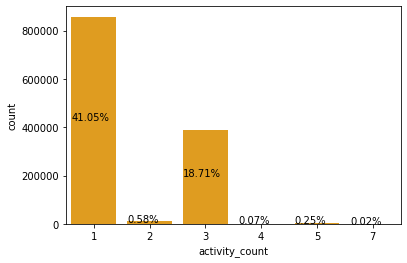

In [56]:
#only one trip
g = sns.countplot(x="activity_count", color="orange",data=df_persons)
for p in g.patches:
    txt = str((p.get_height()/df_persons.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

In [ ]:
# alespon jedna cesta

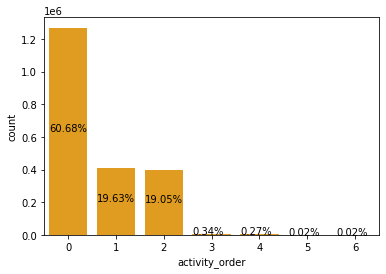

In [15]:
g = sns.countplot(x="activity_order", color="orange",data=df_activities)
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

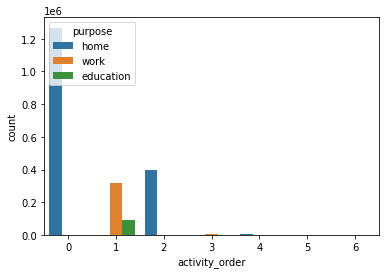

In [16]:
g = sns.countplot(x="activity_order", hue="purpose",data=df_activities)

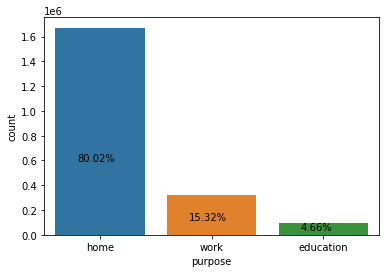

In [17]:
g = sns.countplot(x="purpose", data=df_activities)
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height()/2.8
    g.text(txt_x,txt_y,txt)

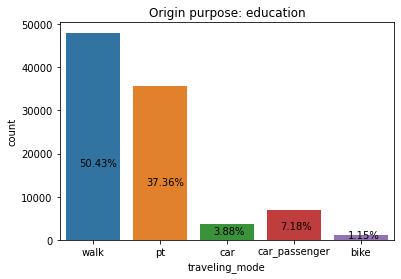

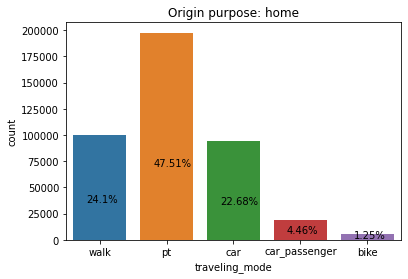

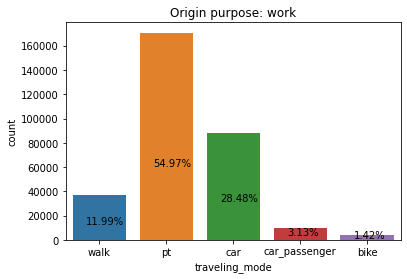

In [32]:
purposes_org = df_joined_origin.groupby("purpose")

for p, df in purposes_org:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Origin purpose: "+str(p))
    plt.show()

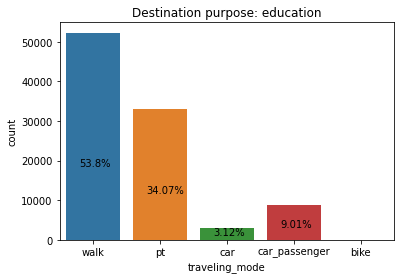

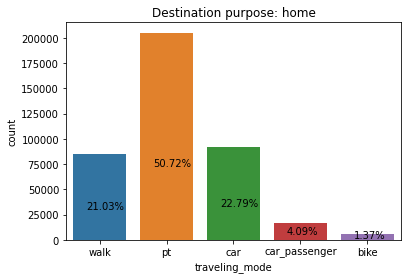

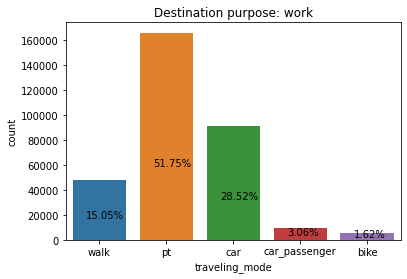

In [33]:
purposes_dest = df_joined_dest.groupby("purpose")

for p, df in purposes_dest:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Destination purpose: "+str(p))
    plt.show()